<a href="https://colab.research.google.com/github/ElzodQurashev/DS_portfolio/blob/main/05_ml_05_amaliyot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Imgur](https://i.imgur.com/5pXzCIu.png)

# Data Science va Sun'iy Intellekt Praktikum

## 5-MODUL. Machine Learning

### Portfolio uchun vazifa: Toshkent shahrida uylarning narxini aniqlash.

Ushbu amaliyotda sizning vazifangiz berilgan ma`lumotlar asosida Toshkent shahridagi uylarning narxini aniqlash.

In [136]:
import numpy as np
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_data_08-02-2021.csv')
df.head()

,location,district,rooms,size,level,max_levels,price
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57,4,4,52000
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52,4,5,56000
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42,4,4,37000
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65,1,4,49500
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70,3,5,55000


# Ustunlar ta'rifi
- `location` - sotilayotgan uy manzili
- `district` - uy joylashgan tuman
- `rooms` - xonalar soni
- `size` - uy maydoni (kv.m)
- `level` - uy joylashgan qavat
- `max_levels` - ja'mi qavatlar soni
- `price` - uy narxi

## Vazifani CRSIP-DM Metolodgiyasi yordamida bajaring.
<img src="https://i.imgur.com/dzZnnYi.png" alt="CRISP-DM" width="800"/>

# **Tozalash**

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   location    7565 non-null   object
 1   district    7565 non-null   object
 2   rooms       7565 non-null   int64 
 3   size        7565 non-null   object
 4   level       7565 non-null   int64 
 5   max_levels  7565 non-null   int64 
 6   price       7565 non-null   object
dtypes: int64(3), object(4)
memory usage: 413.8+ KB


`"size" va "price" ustunlarini "Dtype - int64" ko'rinishiga o'tkazib olamiz`

In [138]:
# df['size'].astype(float)

`astype() metodi ↑ xatolik qaytarganda muammoni aniqlab oldim`

In [139]:
df[df['size']=='Площадьземли:1сот'].index

Int64Index([5347], dtype='int64')

In [140]:
df.drop(5347, inplace=True)

In [141]:
df['size'] = df['size'].astype(float)

In [142]:
df['size'] = df['size'].astype(int)

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7564 entries, 0 to 7564
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   location    7564 non-null   object
 1   district    7564 non-null   object
 2   rooms       7564 non-null   int64 
 3   size        7564 non-null   int64 
 4   level       7564 non-null   int64 
 5   max_levels  7564 non-null   int64 
 6   price       7564 non-null   object
dtypes: int64(4), object(3)
memory usage: 472.8+ KB


In [144]:
# df['price'].astype(int)

`astype() metodi ↑ xatolik qaytarganda muammoni aniqlab oldim` 

In [145]:
len(df[df['price']=='Договорная'])

99

In [146]:
df.drop(df[df['price']=='Договорная'].index, inplace=True)

In [147]:
df.price = df['price'].astype(int)

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7465 entries, 0 to 7564
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   location    7465 non-null   object
 1   district    7465 non-null   object
 2   rooms       7465 non-null   int64 
 3   size        7465 non-null   int64 
 4   level       7465 non-null   int64 
 5   max_levels  7465 non-null   int64 
 6   price       7465 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 466.6+ KB


In [149]:
df.describe()

,rooms,size,level,max_levels,price
count,7465.000000,7465.000000,7465.000000,7465.000000,7.465000e+03
mean,2.622103,113.524180,3.693771,6.023979,7.132367e+04
std,1.083155,1501.158399,2.236905,2.607103,6.405659e+05
min,1.000000,1.000000,1.000000,1.000000,2.000000e+00
25%,2.000000,50.000000,2.000000,4.000000,3.500000e+04
50%,3.000000,65.000000,3.000000,5.000000,4.650000e+04
75%,3.000000,85.000000,5.000000,9.000000,6.700000e+04
max,10.000000,70000.000000,19.000000,25.000000,5.200000e+07


`noodatiy qiymatlar bilan qanday yo'l tutishni aniqlash uchun ularning hajmini tekshirib olamiz` ↓

In [150]:
len(df[df['size']>200])

111

In [151]:
len(df[df['size']<15])

12

In [152]:
df.drop(df[df['size']>200].index, inplace=True)

In [153]:
df.drop(df[df['size']<15].index, inplace=True)

In [154]:
df.drop(df[df['price']<10000].index, inplace=True)

In [155]:
df.drop(df[df['price']>299000].index, inplace=True)

In [156]:
df.drop(df[(df['size']<20) & (df['rooms']!=1)].index, inplace=True)

In [157]:
df.drop(df[(df['size']<30) & (df['rooms']>2)].index, inplace=True)

In [158]:
df.describe()

,rooms,size,level,max_levels,price
count,7304.000000,7304.000000,7304.00000,7304.000000,7304.000000
mean,2.580230,70.383352,3.69414,6.011090,55725.647043
std,1.018048,28.603310,2.22962,2.600733,34628.754887
min,1.000000,15.000000,1.00000,1.000000,10000.000000
25%,2.000000,50.000000,2.00000,4.000000,35000.000000
50%,2.000000,65.000000,3.00000,5.000000,46000.000000
75%,3.000000,84.000000,5.00000,9.000000,65000.000000
max,7.000000,200.000000,19.00000,25.000000,299000.000000


In [159]:
df.corr()

,rooms,size,level,max_levels,price
rooms,1.000000,0.818440,0.141658,0.178011,0.561708
size,0.818440,1.000000,0.192662,0.313441,0.787588
level,0.141658,0.192662,1.000000,0.595449,0.080200
max_levels,0.178011,0.313441,0.595449,1.000000,0.249546
price,0.561708,0.787588,0.080200,0.249546,1.000000


`Ma'lumotlarimiz anchagina tartibli ko'rinishga keldi`

# **Grafiklar**

In [160]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

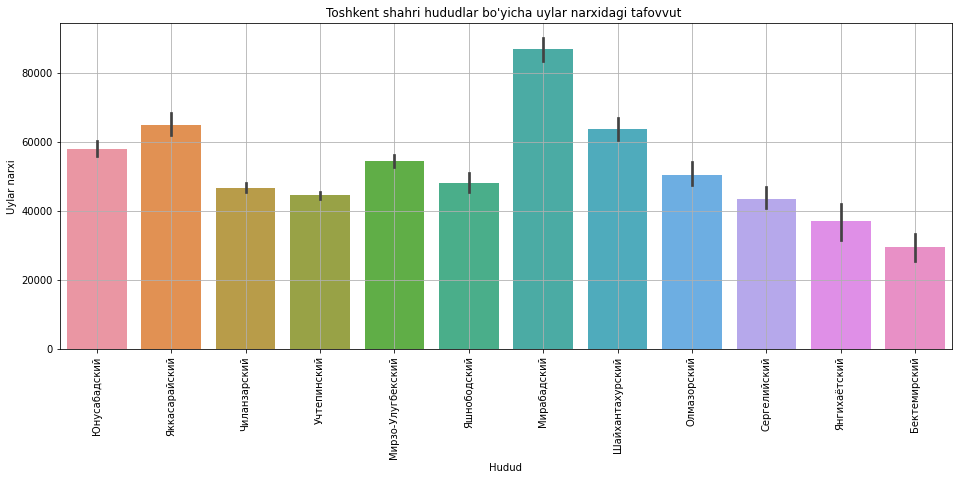

In [161]:
plt.figure(figsize=(16,6))
sns.barplot(x=df.district, y=df['price'])

plt.title("Toshkent shahri hududlar bo'yicha uylar narxidagi tafovvut ")
plt.xlabel('Hudud')
plt.ylabel('Uylar narxi')
plt.xticks(rotation=90)
plt.grid()
plt.show()

`Quyidagi 2 ta grafikda xonalar soniga qarab narxlarning qanday o'zgarishini ko'rishimiz mumkin: ↓`

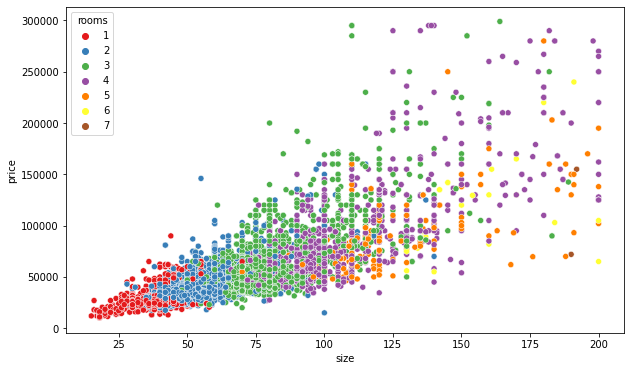

In [162]:
plt.figure(figsize=(10,6))
sns.scatterplot(y=df['price'], x=df['size'], hue=df['rooms'], palette='Set1')
plt.show()

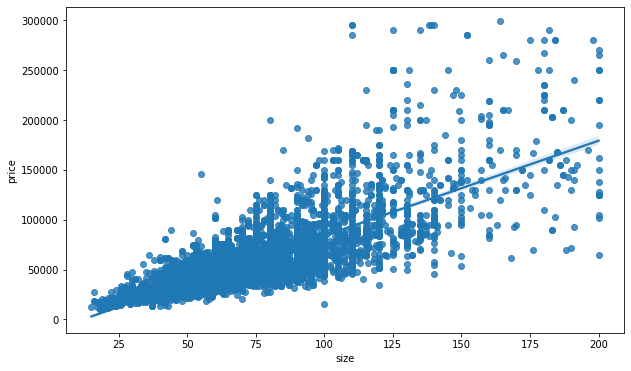

In [163]:
plt.figure(figsize=(10,6))
sns.regplot(y=df['price'], x=df['size'])
plt.show()

---

# **train_test_split**

In [164]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size = 0.25, random_state=55)

In [165]:
print(train_set.shape)
print(test_set.shape)

(5478, 7)
(1826, 7)


In [166]:
X_train = train_set.drop('price', axis=1)
y = train_set['price'].copy()

X_test = test_set.drop('price', axis=1)
y_test = test_set['price'].copy()

# **Pipeline**

## **num_pipeline**

In [167]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

X_num = X_train.drop(['location', 'district'], axis=1)

num_pipeline = Pipeline([
                         ('std_scaler', StandardScaler())
])

## **full_pipeline**

In [168]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

num_attribs = list(X_num)
loc_cat_attribs = ['location']
dis_cat_attribs = ['district']

full_pipeline = ColumnTransformer([
                                   ('num', num_pipeline, num_attribs),
                                   ('loc', OrdinalEncoder(), loc_cat_attribs),
                                   ('dis', OneHotEncoder(), dis_cat_attribs)
])

In [169]:
X_prepared = full_pipeline.fit_transform(X_train)
X_prepared

array([[-1.54910343, -1.33926947, -0.30475901, ...,  0.        ,
         0.        ,  0.        ],
       [-0.57122966, -1.40881553, -1.20111866, ...,  0.        ,
         0.        ,  0.        ],
       [-1.54910343, -1.13063129, -0.75293883, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.54910343, -1.30449644, -0.75293883, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.38451789,  1.19916171,  0.14342082, ...,  0.        ,
         0.        ,  0.        ],
       [-0.57122966, -0.57426281, -0.75293883, ...,  0.        ,
         0.        ,  0.        ]])

# **Machine Learning**

## **LinearRegression**

---


In [170]:
from sklearn.linear_model import LinearRegression

LR_model = LinearRegression()

In [171]:
# Model Training
LR_model.fit(X_prepared, y)

LinearRegression()

In [172]:
# Preparing & Predict
X_test_prepared = full_pipeline.fit_transform(X_test)
y_predicted = LR_model.predict(X_test_prepared)

In [173]:
pd.DataFrame({'Prognoz':y_test, 'Asl qiymat':y_predicted})

,Prognoz,Asl qiymat
1078,48000,69110.150917
3170,63000,51125.308122
4069,84000,86831.525363
1168,30500,20217.736178
5320,53000,42156.035233
...,...,...
4978,34500,31314.161249
3432,62000,73581.644729
3593,35000,50738.262912
7490,35000,35459.961009


### Modelni baholash
`LR_model`

---


In [174]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error
mse = mean_squared_error

In [175]:
print('MAE LR_model =', mae(y_test, y_predicted))
print('RMSE LR_model =', np.sqrt(mse(y_test, y_predicted)))

MAE LR_model = 12818.498651025202
RMSE LR_model = 18677.17367262334


## **RandomForest**

---


In [176]:
from sklearn.ensemble import RandomForestRegressor

RF_model = RandomForestRegressor()

In [177]:
# Model Training
RF_model.fit(X_prepared, y)

RandomForestRegressor()

In [178]:
# Predict
y_predicted = RF_model.predict(X_test_prepared)

In [179]:
pd.DataFrame({'Prognoz':y_test, 'Asl qiymat':y_predicted})

,Prognoz,Asl qiymat
1078,48000,83656.333333
3170,63000,52804.080000
4069,84000,72027.800000
1168,30500,29931.000000
5320,53000,44919.656667
...,...,...
4978,34500,42973.040000
3432,62000,83669.400000
3593,35000,40671.835000
7490,35000,36687.333333


### Modelni baholash
`RF_model`

---


In [180]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error
mse = mean_squared_error

In [181]:
print('MAE RF_model =', mae(y_test, y_predicted))
print('RMSE RF_model =', np.sqrt(mse(y_test, y_predicted)))

MAE RF_model = 11228.74154917006
RMSE RF_model = 17107.98169821295


## **Decision Tree**

---


In [182]:
from sklearn.tree import DecisionTreeRegressor

Tree_model = DecisionTreeRegressor()

In [183]:
# Model Training
Tree_model.fit(X_prepared, y)

DecisionTreeRegressor()

In [184]:
# Predict
y_predicted = Tree_model.predict(X_test_prepared)

In [185]:
pd.DataFrame({'Prognoz':y_test, 'Asl qiymat':y_predicted})

,Prognoz,Asl qiymat
1078,48000,45000.0
3170,63000,43500.0
4069,84000,41500.0
1168,30500,39500.0
5320,53000,40500.0
...,...,...
4978,34500,42500.0
3432,62000,86000.0
3593,35000,40000.0
7490,35000,40000.0


### Modelni baholash
`Tree_model`

---


In [186]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error
mse = mean_squared_error

In [187]:
print('MAE Tree_model =', mae(y_test, y_predicted))
print('RMSE Tree_model =', np.sqrt(mse(y_test, y_predicted)))

MAE Tree_model = 15366.872946330777
RMSE Tree_model = 24006.874545597027


# **Pickle**

In [188]:
import pickle

In [189]:
# LR modelni saqlash
filename = 'LR_model.pql'
with open(filename, 'wb') as file:
  pickle.dump(LR_model, file)

In [190]:
# RF modelni saqlash
filename = 'RF_model.pql'
with open(filename, 'wb' ) as file:
  pickle.dump(RF_model, file)

# **Cross-Validation**

In [191]:
from sklearn.model_selection import cross_val_score

In [192]:
X = df.drop('price', axis=1)
y = df['price'].copy()

X_prepared = full_pipeline.fit_transform(X)

`Validation natijalarini ko'rsatish uchun sodda funksiya yasab olamiz`

In [193]:
def display_scores(scores):
  print("Scores:", scores)
  print("Mean:", scores.mean())
  print("Std_div:", scores.std())

### **LR_model**

---


In [194]:
scores = cross_val_score(LR_model, X_prepared, y, scoring='neg_mean_squared_error', cv=10)
LR_rmse_scores = np.sqrt(-scores)

In [195]:
display_scores(LR_rmse_scores)

Scores: [15447.45381931 17088.52775264 22035.63091665 23320.58681217
 23292.62705711 23199.0117445  19492.0423855  17620.86310569
 18028.14650556 16186.69451818]
Mean: 19571.158461731236
Std_div: 2965.7423018666823


### **RF_model**

---


In [196]:
scores = cross_val_score(RF_model, X_prepared, y, scoring='neg_mean_squared_error', cv=5)
RF_rmse_scores = np.sqrt(-scores)

In [197]:
display_scores(RF_rmse_scores)

Scores: [14174.24711149 20456.95048148 19139.40587036 16867.39337568
 15126.57996192]
Mean: 17152.915360183793
Std_div: 2363.1680056846712


### **Tree_model**

---


In [198]:
scores = cross_val_score(Tree_model, X_prepared, y, scoring='neg_mean_squared_error', cv=5)
Tree_rmse_scores = np.sqrt(-scores)

In [199]:
display_scores(Tree_rmse_scores)

Scores: [21770.46461687 28018.29357984 24293.46646974 24304.27287925
 20578.35445439]
Mean: 23792.97040001757
Std_div: 2560.842354997799
